In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
#%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set plot and display defaults

In [65]:
sns.set_theme()
#sns.set_palette('colorblind')

- output 1 node
- 256 x 256
- sigmoid activation
- 

In [3]:
import os
for dirname, _, filenames in os.walk('../Data/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Data/train/.DS_Store
../Data/train/PNEUMONIA/BACTERIA-4038442-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-8034950-0011.jpeg
../Data/train/PNEUMONIA/BACTERIA-292199-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-2092977-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-4407438-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8093423-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-880930-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-3443773-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-9072988-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-9674936-0007.jpeg
../Data/train/PNEUMONIA/VIRUS-1387612-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-778527-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7564600-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-1982399-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3246536-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-4991468-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8188709-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-112674-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3044214-0001.jpeg
../Data/train/PNEUMO

../Data/train/PNEUMONIA/BACTERIA-8705009-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-4422870-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-513140-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-6870430-0005.jpeg
../Data/train/PNEUMONIA/VIRUS-2520412-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3893778-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-3309082-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-8324394-0008.jpeg
../Data/train/PNEUMONIA/VIRUS-2889187-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6565531-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-9175020-0003.jpeg
../Data/train/PNEUMONIA/VIRUS-8748267-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-232309-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-5628383-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-4615614-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-2714225-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-4926863-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-9597998-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-1507089-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5185430-0003.jpeg
../

../Data/train/PNEUMONIA/VIRUS-2814755-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-9044474-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-284986-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-198200-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-384983-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7172433-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-7823222-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-6340005-0005.jpeg
../Data/train/PNEUMONIA/BACTERIA-155541-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-324273-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-6715985-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-3504519-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-5442456-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5611650-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-92115-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-1083680-0008.jpeg
../Data/train/PNEUMONIA/BACTERIA-1844534-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4061450-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-4092125-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-5091264-0001.jpeg
..

../Data/train/PNEUMONIA/BACTERIA-7430292-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-6339924-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-7075658-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5091264-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-1884647-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-7718116-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-3590786-0004.jpeg
../Data/train/PNEUMONIA/BACTERIA-1718141-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-1393486-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-4313165-0004.jpeg
../Data/train/PNEUMONIA/VIRUS-4647402-0006.jpeg
../Data/train/PNEUMONIA/BACTERIA-9400981-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-1776217-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-5670779-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-2355867-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-7700975-0003.jpeg
../Data/train/PNEUMONIA/VIRUS-1754515-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-6738888-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-9742081-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-741892-0002.jpeg
../Data/

../Data/train/PNEUMONIA/VIRUS-8110550-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-9130179-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-8121494-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-1805246-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-3775613-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-9438146-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-4943496-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-1213217-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-5817596-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-5943537-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-8562352-0002.jpeg
../Data/train/PNEUMONIA/BACTERIA-939876-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-9123837-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6660139-0001.jpeg
../Data/train/PNEUMONIA/VIRUS-12220-0001.jpeg
../Data/train/PNEUMONIA/BACTERIA-6518498-0002.jpeg
../Data/train/PNEUMONIA/VIRUS-4617189-0009.jpeg
../Data/train/PNEUMONIA/VIRUS-935458-0003.jpeg
../Data/train/PNEUMONIA/BACTERIA-3322717-0004.jpeg
../Data/train/PNEUMONIA/VIRUS-4333878-0002.jpeg
../Data/

../Data/train/NORMAL/NORMAL-4689461-0001.jpeg
../Data/train/NORMAL/NORMAL-2992797-0002.jpeg
../Data/train/NORMAL/NORMAL-2416577-0003.jpeg
../Data/train/NORMAL/NORMAL-791713-0001.jpeg
../Data/train/NORMAL/NORMAL-9784617-0001.jpeg
../Data/train/NORMAL/NORMAL-6505040-0002.jpeg
../Data/train/NORMAL/NORMAL-4617560-0001.jpeg
../Data/train/NORMAL/NORMAL-6836464-0001.jpeg
../Data/train/NORMAL/NORMAL-9271582-0001.jpeg
../Data/train/NORMAL/NORMAL-385855-0005.jpeg
../Data/train/NORMAL/NORMAL-7323530-0001.jpeg
../Data/train/NORMAL/NORMAL-8654141-0002.jpeg
../Data/train/NORMAL/NORMAL-6369415-0001.jpeg
../Data/train/NORMAL/NORMAL-8813251-0001.jpeg
../Data/train/NORMAL/NORMAL-3532468-0001.jpeg
../Data/train/NORMAL/NORMAL-1507671-0003.jpeg
../Data/train/NORMAL/NORMAL-2550592-0003.jpeg
../Data/train/NORMAL/NORMAL-8272933-0001.jpeg
../Data/train/NORMAL/NORMAL-170867-0002.jpeg
../Data/train/NORMAL/NORMAL-275284-0001.jpeg
../Data/train/NORMAL/NORMAL-2558319-0001.jpeg
../Data/train/NORMAL/NORMAL-1843288-00

../Data/train/NORMAL/NORMAL-7133593-0001.jpeg
../Data/train/NORMAL/NORMAL-385855-0004.jpeg
../Data/train/NORMAL/NORMAL-5528656-0001.jpeg
../Data/train/NORMAL/NORMAL-926639-0001.jpeg
../Data/train/NORMAL/NORMAL-5387596-0001.jpeg
../Data/train/NORMAL/NORMAL-9422624-0001.jpeg
../Data/train/NORMAL/NORMAL-4019172-0001.jpeg
../Data/train/NORMAL/NORMAL-8027466-0001.jpeg
../Data/train/NORMAL/NORMAL-9462561-0001.jpeg
../Data/train/NORMAL/NORMAL-6524946-0001.jpeg
../Data/train/NORMAL/NORMAL-8349062-0001.jpeg
../Data/train/NORMAL/NORMAL-705219-0002.jpeg
../Data/train/NORMAL/NORMAL-1897360-0001.jpeg
../Data/train/NORMAL/NORMAL-3103404-0002.jpeg
../Data/train/NORMAL/NORMAL-6351934-0001.jpeg
../Data/train/NORMAL/NORMAL-2416577-0002.jpeg
../Data/train/NORMAL/NORMAL-831813-0001.jpeg
../Data/train/NORMAL/NORMAL-8622264-0001.jpeg
../Data/train/NORMAL/NORMAL-6217600-0001.jpeg
../Data/train/NORMAL/NORMAL-9346821-0001.jpeg
../Data/train/NORMAL/NORMAL-2415019-0001.jpeg
../Data/train/NORMAL/NORMAL-6891737-00

../Data/train/NORMAL/NORMAL-2214391-0001.jpeg
../Data/train/NORMAL/NORMAL-2239107-0003.jpeg
../Data/train/NORMAL/NORMAL-3514363-0004.jpeg
../Data/train/NORMAL/NORMAL-1930015-0001.jpeg
../Data/train/NORMAL/NORMAL-4464072-0001.jpeg
../Data/train/NORMAL/NORMAL-9978536-0001.jpeg
../Data/train/NORMAL/NORMAL-9557588-0001.jpeg
../Data/train/NORMAL/NORMAL-6015860-0001.jpeg
../Data/train/NORMAL/NORMAL-6960239-0001.jpeg
../Data/train/NORMAL/NORMAL-3780378-0003.jpeg
../Data/train/NORMAL/NORMAL-6432470-0001.jpeg
../Data/train/NORMAL/NORMAL-1701841-0001.jpeg
../Data/train/NORMAL/NORMAL-9058260-0001.jpeg
../Data/train/NORMAL/NORMAL-1505602-0001.jpeg
../Data/train/NORMAL/NORMAL-9990348-0001.jpeg
../Data/train/NORMAL/NORMAL-7749598-0002.jpeg
../Data/train/NORMAL/NORMAL-5397211-0002.jpeg
../Data/train/NORMAL/NORMAL-4587209-0001.jpeg
../Data/train/NORMAL/NORMAL-6002769-0001.jpeg
../Data/train/NORMAL/NORMAL-385855-0001.jpeg
../Data/train/NORMAL/NORMAL-6153007-0001.jpeg
../Data/train/NORMAL/NORMAL-7298793

In [10]:
pneumonia_filenames = "..Data/train/PNEUMONIA"
normal_filenames = "..Data/train/NORMAL"

## Loading data and file paths

In [15]:
# Setting the paths to the train and validation directories

parent_dir =  os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

In [16]:
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

In [55]:
pneumonia_filenames

['BACTERIA-4038442-0001.jpeg',
 'BACTERIA-8034950-0011.jpeg',
 'BACTERIA-292199-0002.jpeg',
 'BACTERIA-2092977-0003.jpeg',
 'BACTERIA-4407438-0002.jpeg',
 'BACTERIA-8093423-0001.jpeg',
 'BACTERIA-880930-0002.jpeg',
 'VIRUS-3443773-0006.jpeg',
 'BACTERIA-9072988-0002.jpeg',
 'VIRUS-9674936-0007.jpeg',
 'VIRUS-1387612-0002.jpeg',
 'BACTERIA-778527-0001.jpeg',
 'BACTERIA-7564600-0004.jpeg',
 'BACTERIA-1982399-0002.jpeg',
 'BACTERIA-3246536-0004.jpeg',
 'BACTERIA-4991468-0003.jpeg',
 'BACTERIA-8188709-0003.jpeg',
 'BACTERIA-112674-0001.jpeg',
 'BACTERIA-3044214-0001.jpeg',
 'VIRUS-6897628-0002.jpeg',
 'VIRUS-385176-0010.jpeg',
 'BACTERIA-4679582-0001.jpeg',
 'BACTERIA-6162615-0002.jpeg',
 'BACTERIA-1199786-0002.jpeg',
 'BACTERIA-5150733-0007.jpeg',
 'BACTERIA-516591-0002.jpeg',
 'BACTERIA-3582443-0002.jpeg',
 'VIRUS-149498-0002.jpeg',
 'BACTERIA-2792838-0006.jpeg',
 'BACTERIA-6944416-0001.jpeg',
 'BACTERIA-4521338-0003.jpeg',
 'BACTERIA-5401887-0003.jpeg',
 'BACTERIA-1790048-0002.jpeg',
 '

In [56]:
normal_filenames

['NORMAL-2552119-0002.jpeg',
 'NORMAL-7298141-0001.jpeg',
 'NORMAL-3411116-0002.jpeg',
 'NORMAL-1619233-0001.jpeg',
 'NORMAL-7327513-0001.jpeg',
 'NORMAL-2699389-0001.jpeg',
 'NORMAL-3781678-0001.jpeg',
 'NORMAL-8648239-0002.jpeg',
 'NORMAL-5728847-0001.jpeg',
 'NORMAL-6881695-0001.jpeg',
 'NORMAL-8903542-0001.jpeg',
 'NORMAL-715046-0001.jpeg',
 'NORMAL-6084744-0001.jpeg',
 'NORMAL-4994733-0001.jpeg',
 'NORMAL-3853078-0002.jpeg',
 'NORMAL-5264964-0001.jpeg',
 'NORMAL-3573766-0003.jpeg',
 'NORMAL-71482-0001.jpeg',
 'NORMAL-6702380-0001.jpeg',
 'NORMAL-6710847-0001.jpeg',
 'NORMAL-5759621-0001.jpeg',
 'NORMAL-6047821-0001.jpeg',
 'NORMAL-9989984-0001.jpeg',
 'NORMAL-2675017-0001.jpeg',
 'NORMAL-2333546-0001.jpeg',
 'NORMAL-2881863-0001.jpeg',
 'NORMAL-7157255-0001.jpeg',
 'NORMAL-2411226-0001.jpeg',
 'NORMAL-4946392-0001.jpeg',
 'NORMAL-9175762-0002.jpeg',
 'NORMAL-705474-0001.jpeg',
 'NORMAL-28501-0001.jpeg',
 'NORMAL-9000251-0001.jpeg',
 'NORMAL-9816293-0002.jpeg',
 'NORMAL-2559035-000

## Looking at the images

In [44]:
from PIL import Image

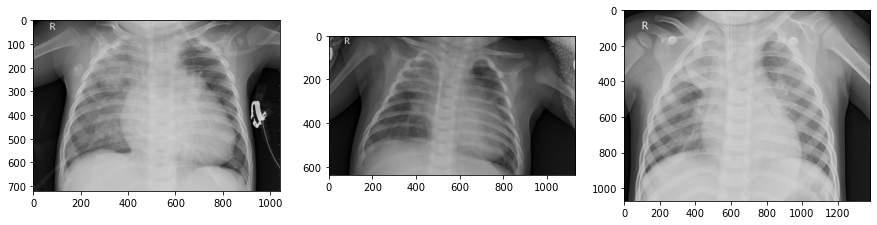

In [54]:
plt.figure(figsize=(15,15))

for i in range(3):
    filename = pneumonia_filenames[i]
    img_addr = train_dir + '/PNEUMONIA/' + filename
    img = Image.open(img_addr)
    # rows, columns, (change the range for # of images)
    ax = plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')

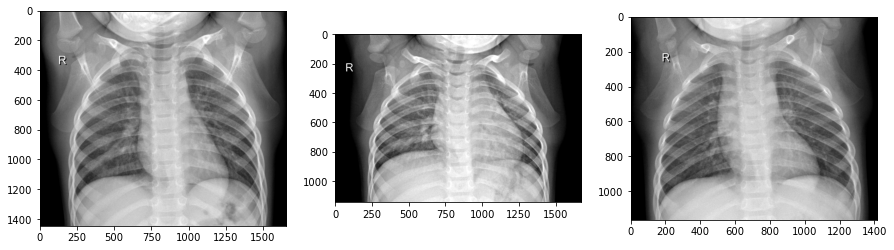

In [50]:
plt.figure(figsize=(15,15))

for i in range(3):
    filename = normal_filenames[i]
    img_addr = train_path + '/NORMAL/' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## ImageDataGenerator

In [67]:
## KEEPING THIS ONE
# Defining the image size and batch size
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]

# Splitting the data into training and validation sets
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, 
                                   brightness_range=brightness, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              color_mode='grayscale',
                                              subset='training',
                                              shuffle=True)

val_generator = train_datagen.flow_from_directory(train_dir,
                                            target_size=img_size,
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            color_mode='grayscale',
                                            subset='validation',
                                            shuffle=True)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


validation data = validation set when fitting the model

In [20]:
# Setting the paths to the train and test directories
parent_dir = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

# Defining the image size and batch size
img_size = (224, 224)
batch_size = 32

# Getting the list of filenames in the pneumonia and normal folders
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

# Creating the corresponding labels for the pneumonia and normal images
pneumonia_labels = np.ones(len(pneumonia_filenames))
normal_labels = np.zeros(len(normal_filenames))

# Concatenating the filenames and labels into a single list
filenames = pneumonia_filenames + normal_filenames
labels = np.concatenate([pneumonia_labels, normal_labels])

# Splitting the data into training and validation sets
train_filenames, val_filenames, train_labels, val_labels = train_test_split(filenames, labels, 
                                                                            test_size=0.2, 
                                                                            random_state=42)

# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(train_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=True)


Found 5232 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
# Setting the paths to the train and test directories
parent_dir = os.path.dirname(os.getcwd())
train_dir = os.path.join(parent_dir, 'Data/train')
test_dir = os.path.join(parent_dir, 'Data/test')

# Defining the image size and batch size
img_size = (224, 224)
batch_size = 32

# Getting the list of filenames in the pneumonia and normal folders
pneumonia_filenames = os.listdir(os.path.join(train_dir, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_dir, 'normal'))

# Creating the corresponding labels for the pneumonia and normal images
pneumonia_labels = np.ones(len(pneumonia_filenames))
normal_labels = np.zeros(len(normal_filenames))

# Concatenating the filenames and labels into a single list
filenames = pneumonia_filenames + normal_filenames
labels = np.concatenate([pneumonia_labels, normal_labels])

# Splitting the data into training and validation sets
train_filenames, val_filenames, train_labels, val_labels = train_test_split(filenames, labels, 
                                                                            test_size=0.2, 
                                                                            random_state=42)

In [28]:
len(val_filenames)

1047

In [29]:
len(train_filenames)

4186

In [26]:
# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    color_mode='grayscale')


Found 5232 images belonging to 2 classes.


In [ ]:
# Defining the data generators for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(train_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle=True)

# Data Visualization

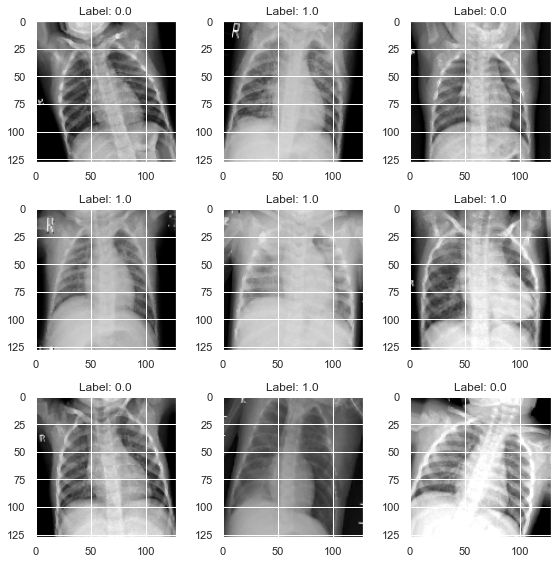

In [71]:
# Plot some sample images from the training data generator
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    img, label = train_generator.next()
    ax.imshow(img[0], cmap='gray')
    ax.set(title=f"Label: {label[0]}")
plt.tight_layout()
plt.show()

In [59]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [61]:
# Extracting the labels from the train_generator
train_labels = train_generator.classes
train_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [62]:
# Converting the numeric labels to their corresponding class names
class_names = np.array(['normal', 'pneumonia'])
train_class_names = class_names[train_labels]
train_class_names

array(['normal', 'normal', 'normal', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype='<U9')

/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

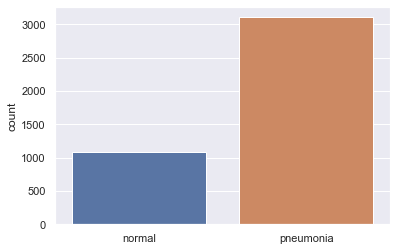

In [66]:
# Plotting the countplot
sns.set_style('darkgrid')
sns.countplot(train_class_names)
;

## Initial base model

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
#Gideon's

In [76]:

train_data_dir = train_generator
validation_data_dir = val_generator
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [77]:
val_generator

In [83]:
img_width, img_height = 256, 256

In [84]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [85]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['recall'])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
img_width, img_height = 256, 256

In [116]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.


In [103]:
train_data_dir = train_generator
validation_data_dir = val_generator
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [104]:
img_width, img_height = 256, 256

In [105]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [106]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['Recall'])

In [108]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10


InvalidArgumentError:  input depth must be evenly divisible by filter depth: 1 vs 3
	 [[node sequential_4/activation_15/Relu (defined at <ipython-input-108-3bb64fd7de71>:1) ]] [Op:__inference_train_function_3582]

Function call stack:
train_function


In [113]:
#Kevin's
model = Sequential(name='Model1')
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
model.fit(train_generator, epochs=8, workers=8, validation_data=val_generator, validation_steps=100//32)

Epoch 1/8


KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
model.save_weights

In [ ]:
#basic

In [ ]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

In [117]:
model = Sequential(name='Model_3')
model.add(Flatten(input_shape=img_size+(1,))) # the "+(1,)" is because our images are grayscale
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])


In [118]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
131/131 [==============================] - 138s 1s/step - loss: 81.5192 - accuracy: 0.6835 - val_loss: 0.6741 - val_accuracy: 0.7416
Epoch 2/10
131/131 [==============================] - 109s 834ms/step - loss: 0.6620 - accuracy: 0.7418 - val_loss: 0.6506 - val_accuracy: 0.7426
Epoch 3/10
131/131 [==============================] - 150s 1s/step - loss: 0.6408 - accuracy: 0.7421 - val_loss: 0.6314 - val_accuracy: 0.7426
Epoch 4/10
131/131 [==============================] - 96s 736ms/step - loss: 3.6402 - accuracy: 0.7375 - val_loss: 0.6171 - val_accuracy: 0.7416
Epoch 5/10
131/131 [==============================] - 88s 668ms/step - loss: 0.6106 - accuracy: 0.7421 - val_loss: 0.6048 - val_accuracy: 0.7426
Epoch 6/10
131/131 [==============================] - 88s 671ms/step - loss: 3.0088 - accuracy: 0.7394 - val_loss: 0.5955 - val_accuracy: 0.7426
Epoch 7/10
131/131 [==============================] - 108s 821ms/step - loss: 0.5922 - accuracy: 0.7421 - val_loss: 0.5886 - val_acc

In [ ]:
#model 2

In [ ]:
img_size = (128,128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

In [124]:
# Define the model architecture
model = Sequential(name='Model_4')
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
# Train the model
history_4 = model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10
 98/131 [=====================>........] - ETA: 37s - loss: 2.7956 - recall: 0.9219

KeyboardInterrupt: 

In [125]:
# Train the model
history_4 = model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=100//32)

Epoch 1/10
131/131 [==============================] - 181s 1s/step - loss: 2.3023 - accuracy: 0.8495 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 2/10
131/131 [==============================] - 177s 1s/step - loss: 0.1590 - accuracy: 0.9432 - val_loss: 0.1024 - val_accuracy: 0.9583
Epoch 3/10
131/131 [==============================] - 321s 2s/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.1725 - val_accuracy: 0.9375
Epoch 4/10
131/131 [==============================] - 137s 1s/step - loss: 0.1310 - accuracy: 0.9496 - val_loss: 0.1907 - val_accuracy: 0.9375
Epoch 5/10
131/131 [==============================] - 90s 689ms/step - loss: 0.1121 - accuracy: 0.9587 - val_loss: 0.1896 - val_accuracy: 0.9688
Epoch 6/10
131/131 [==============================] - 98s 749ms/step - loss: 0.1167 - accuracy: 0.9539 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 7/10
131/131 [==============================] - 97s 742ms/step - loss: 0.1087 - accuracy: 0.9584 - val_loss: 0.0741 - val_accuracy: 